# Note

<br />

- tf.get_variable()을 사용할 때 variable_scope에 reuse가 true인 경우 의미 그대로 재사용이므로 다른 곳에 해당 텐서가 생성되어 있어야만 한다

In [1]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.python.training import moving_averages

%matplotlib inline

# import py

In [2]:
import sys
sys.path.append("../../")

In [3]:
%run ../../ai/tf/ops/cells.py
%run ../../ai/tf/ops/convs.py
%run ../../ai/tf/ops/regularizes.py
%run ../../ai/tf/ops/weights.py

In [ ]:
t = time.process_time()         
elapsed_time = time.process_time() - t
print(elapsed_time)

# define vars

In [4]:
def get_init_ops():
    init_ops = []
    init_ops.append(tf.global_variables_initializer())
    
    return init_ops

In [5]:
initializer = tf.initializers.random_uniform(0, 1)
x = tf.get_variable("white_noise", [128,128,3], initializer=initializer)

i = tf.expand_dims(x, 0)
with tf.variable_scope("y"):
    y = sep_conv(i, 3, 3, True)
with tf.variable_scope("j"):
    j = conv(i, 3, 3, True)
with tf.variable_scope("k"):
    k = max_pool(i, 3, 1, True)
with tf.variable_scope("h"):
    h = max_pool(i, 3, 3, True)
with tf.variable_scope('l'):
    l = avg_pool(i, 3, 3, True)

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [7]:
with tf.variable_scope('cell_1'):
    cell1 = convolution_cell(i, i, 64, True)
with tf.variable_scope('cell_2'):
    cell2 = reduction_cell(i, cell1, 32, True)
with tf.variable_scope('fac_red'):
    red = factorized_reduction(cell1, 64, 2, True)

origin: (128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


sep 3x3: (1, 128, 128, 3)
conv 3x3: (1, 128, 128, 3)
max-pool 3: (1, 128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max-pool 3: (1, 43, 43, 3)
avg-pool 3: (1, 43, 43, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


conv cell: (1, 128, 128, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


red cell: (1, 128, 128, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


fac_red cell: (1, 64, 64, 64)


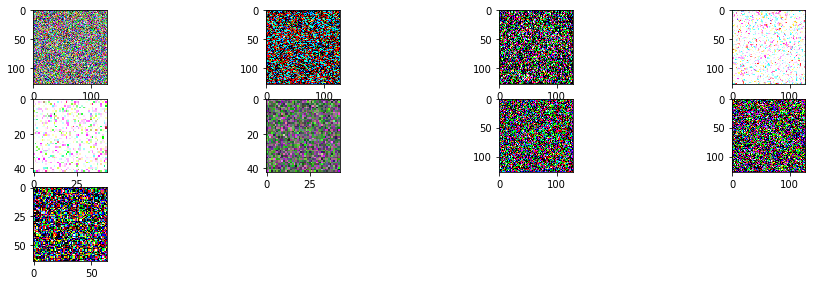

In [8]:
init_ops = get_init_ops()
fig=plt.figure(figsize=(16, 16))

n = 10
c = 4
with tf.Session() as sess:
    sess.run(init_ops)

    v_x = sess.run(x)
    print("origin: {}".format(v_x.shape))
    fig.add_subplot(n, c, 1)
    plt.imshow(v_x)

    v_y = sess.run(y)
    print("sep 3x3: {}".format(v_y.shape))
    fig.add_subplot(n, c, 2)
    plt.imshow(v_y[0])
    
    v_j = sess.run(j)
    print("conv 3x3: {}".format(v_j.shape))
    fig.add_subplot(n, c, 3)
    plt.imshow(v_j[0])
    
    v_k = sess.run(k)
    print("max-pool 3: {}".format(v_k.shape))
    fig.add_subplot(n, c, 4)
    plt.imshow(v_k[0])
    
    v_h = sess.run(h)
    print("max-pool 3: {}".format(v_h.shape))
    fig.add_subplot(n, c, 5)
    plt.imshow(v_h[0])
    
    v_l = sess.run(l)
    print("avg-pool 3: {}".format(v_l.shape))
    fig.add_subplot(n, c, 6)
    plt.imshow(v_l[0])
        
    v_c1 = sess.run(cell1)
    print("conv cell: {}".format(v_c1.shape))
    fig.add_subplot(n, c, 7)
    plt.imshow(v_c1[0][:,:,3:6])
    
    v_c2 = sess.run(cell2)
    print("red cell: {}".format(v_c2.shape))
    fig.add_subplot(n, c, 8)
    plt.imshow(v_c2[0][:,:,3:6])
        
    v_red = sess.run(red)
    print("fac_red cell: {}".format(v_red.shape))
    fig.add_subplot(n, c, 9)
    plt.imshow(v_red[0][:,:,3:6])